# Worksheet 18

Name: Rithik Bhandary
UID: U20434494

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

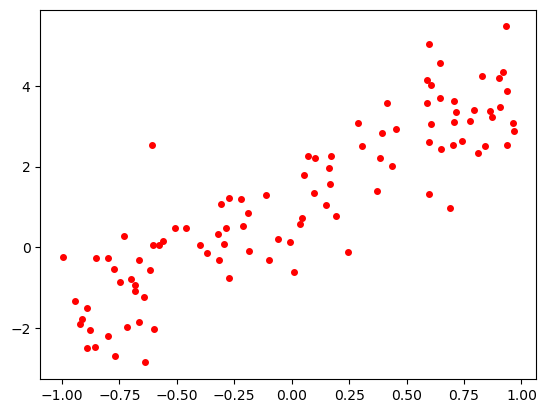

In [6]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

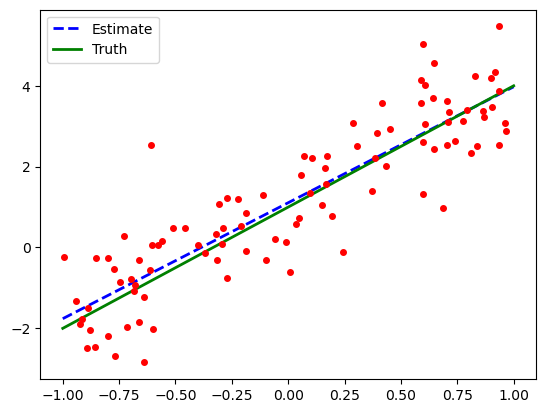

In [7]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

True beta: [1 3]

Estimated beta: [1.10741971 2.86825526]

The estimated beta is quite similar to the true beta

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

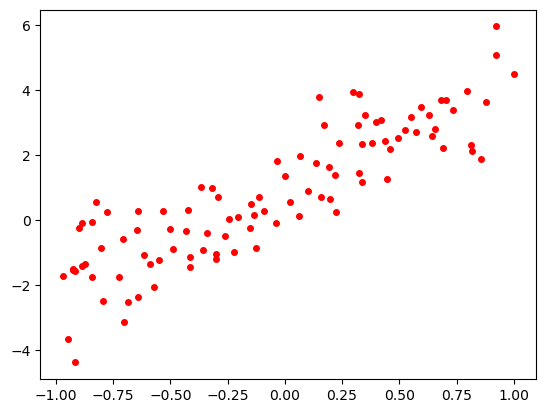

In [9]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 3, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

plt.plot(x, y, 'ro', markersize=4)
plt.show()



e) Plot the least squares estimate line through the scatter plot.

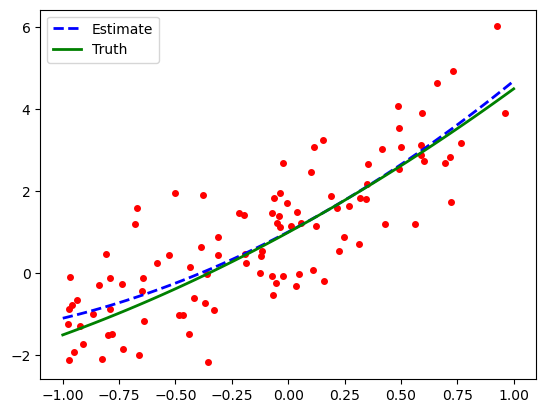

In [11]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 3, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

plt.plot(x, y, 'ro', markersize=4)

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1, 1, 100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')

plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2, lw=2, c='g', label='Truth')

plt.legend()
plt.show()


In [12]:
print(beta_hat)

[1.01168428 2.89203644 0.78661527]


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated beta has the following values [1.01168428 2.89203644 0.78661527] and is estimating the data not as well as the first part

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

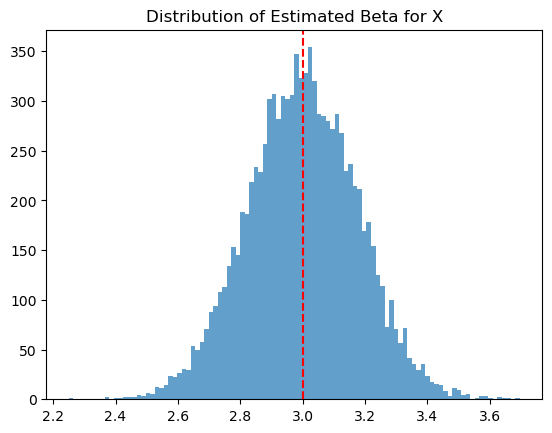

In [14]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 3, 0.5])
estimated_betas = []

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    estimated_betas.append(beta_hat)

estimated_betas = np.array(estimated_betas)

plt.hist(estimated_betas[:, 1], bins=100, alpha=0.7, label='Estimated Betas')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Beta')
plt.title('Distribution of Estimated Beta for X')
plt.show()
